
### 💡 **Question 4: -**

Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.

**Link -** https://data.nasa.gov/resource/y77d-th95.json

**Note -** Write code comments wherever needed for code understanding.

**Sample Data -**


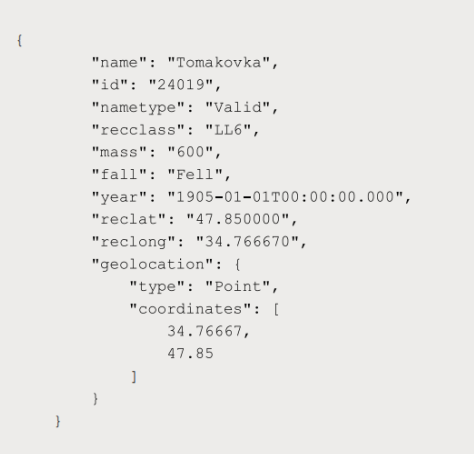


**Excepted Output Data Attributes:**


```
● Name of Earth Meteorite - string id - ID of Earth
● Meteorite - int nametype - string recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int
```





In [ ]:
import pandas as pd
import requests

def fetch_data(url):
    """
    Fetches data from the specified URL using the requests library.
    Returns the parsed JSON data if the response is successful (status code 200),
    otherwise raises an exception.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Error downloading data from URL: {}".format(url))
    
def read_data(data):
    """
    Extracts specific attributes from the data and returns them as a list of dictionaries.
    """
    attributes = []

    for meteorite in data:
        attributes.append({
            'Name of Earth Meteorite': meteorite.get('name', ''),
            'id': meteorite.get('id', ''),
            'nametype': meteorite.get('nametype', ''),
            'recclass': meteorite.get('recclass', ''),
            'mass': meteorite.get('mass', ''),
            'year': meteorite.get('year', ''),
            'reclat': meteorite.get('reclat', ''),
            'reclong': meteorite.get('reclong', ''),
            'coordinates': meteorite.get('geolocation', {}).get('coordinates', [])
        })

    return attributes



def convert_to_csv(df, filename):
    # Convert the DataFrame to a CSV file with the specified filename.
    # Set index=False to exclude the index column in the resulting CSV file.
    df.to_csv(filename, index=False)

def main():
    # Define the URL to fetch the data from.
    url = "https://data.nasa.gov/resource/y77d-th95.json"
    
    # Download the data from the URL using the dload_data function.
    data = fetch_data(url)

    # Read the relevant data attributes using the read_data function.
    attributes = read_data(data)
     
    # Convert the list of dictionaries to a DataFrame.
    df = pd.DataFrame(attributes)

    # Convert the DataFrame to a CSV file.
    convert_to_csv(df, "meteorite.csv")

if __name__ == "__main__":
    main()


Explanation:

The dload_data function fetches the data from the provided URL using the requests library.

It checks if the response status code is 200, indicating a successful request.

If the response is successful, it parses the response content as JSON using response.json() and returns the parsed data.

If the response status code is not 200, it raises an exception with an error message indicating the issue.

The read_data function iterates over the data and extracts the relevant attributes, storing them in a list of dictionaries.

The extracted attributes include information such as the name, ID, type, class, mass, year, latitude, longitude, and coordinates of the meteorites.

The convert_to_csv function takes a DataFrame (df) and a filename as input.

It uses the to_csv() method of the DataFrame to convert the data into a CSV file with the specified filename.

The index=False parameter is used to exclude the index column in the resulting CSV file.

The main function is the entry point of the program.

It defines the URL to fetch the data from.

It calls the dload_data function to download the data from the URL.

The downloaded data is then processed using the read_data function to extract the relevant attributes.

The list of dictionaries is converted to a DataFrame using pd.DataFrame().

Finally, the convert_to_csv function is called to convert the DataFrame into a CSV file with the filename "meteorite.csv".